# Laboratorium 1: Self-Organized Criticality

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import imageio
import glob
from typing import Callable

random.seed()


In [8]:

def VonNeumann(x, y):
    return [(x-1, y), (x, y-1), (x+1, y), (x, y+1)]


def Moore(x, y):
    return [(x-1, y+1), (x-1, y), (x-1, y-1), (x, y+1),(x, y-1), (x+1, y-1), (x+1, y), (x+1, y+1)]


def Manhattan(x, y):
    return [(x-2, y), (x, y-2), (x+2, y), (x, y+2), (x-1, y+1), (x-1, y), (x-1, y-1), (x, y+1),(x, y-1), (x+1, y-1), (x+1, y), (x+1, y+1)]


def generate_gif(sim_id: int, fps: int, iter: int = None):
    path = f'./images/sim_{sim_id}/*' if iter is None else f'./images/sim_{sim_id}/{iter:05}*'
    gif = f'./simulation_{sim_id}.gif' if iter is None else f'./simulation_{sim_id}_{iter}.gif'
    with imageio.get_writer(gif, mode='I', fps=fps) as writer:
        for filename in sorted(glob.glob(path)):
            image = imageio.imread(filename)
            writer.append_data(image)


def save_grid(sim_id: int, img: np.typing.ArrayLike, i: int, time: int):
    # 'upscale' grid to 400x400
    plt.imsave(f'./images/sim_{sim_id}/{i:05}_{time:05}.png',
               img, cmap='binary', vmin=0, vmax=3)


In [3]:
def run_sim(sim_id: int,
            grid_size: int,
            iterations: int,
            limit: int = 4,
            neighborhood: Callable = VonNeumann,
            img: bool = True) -> list[tuple[int, int, int]]:
    
    grid = np.zeros(shape=(grid_size, grid_size))
    avalanches = []
    scale = 400//grid_size
    upscale = np.ones((scale, scale))

    def collapse(neighbours: set[tuple[int, int]], time: int, size: int, i: int) -> tuple[int, int]:
        if len(neighbours) == 0:
            return (time, size)

        def in_grid(c):
            nx, ny = c
            return nx >= 0 and ny >= 0 and nx < grid_size and ny < grid_size
        neighbours = list(filter(in_grid, neighbours))

        time += 1

        new_neighbours = set()
        for nx, ny in neighbours:
            grid[nx][ny] += 1

        for nx, ny in neighbours:
            h = grid[nx][ny]
            if h > limit - 1:
                grid[nx][ny] = 0
                new_neighbours.update(neighborhood(nx, ny))
                size += 1

        if img:
            save_grid(sim_id, np.kron(grid, upscale), i, time)

        return collapse(new_neighbours, time, size, i)

    for i in range(iterations):
        x = random.randrange(grid_size)
        y = random.randrange(grid_size)

        neighbours = []
        h = grid[x][y] + 1
        if h > limit - 1:
            grid[x][y] = 0
            neighbours = set(neighborhood(x, y))
        else:
            grid[x][y] = h

        if img:
            save_grid(sim_id, np.kron(grid, upscale), i, 0)

        if len(neighbours) > 0:
            time, size = collapse(neighbours, 0, 1, i)
            avalanches.append((time, size, i))

    return avalanches

In [ ]:
sim_id = 17
run_sim(sim_id,10,400)
generate_gif(sim_id,2)

![sim_17](./simulation_17.gif)

In [138]:
sim_id = 19
run_sim(sim_id,100,30000)
generate_gif(sim_id,10)


/tmp/ipykernel_48683/2879644668.py:11: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


![sim_19](./simulation_19.gif)

In [7]:
avalanches = []
for i in range(100):
    avalanches += run_sim(i, 10, 100000, img=False)


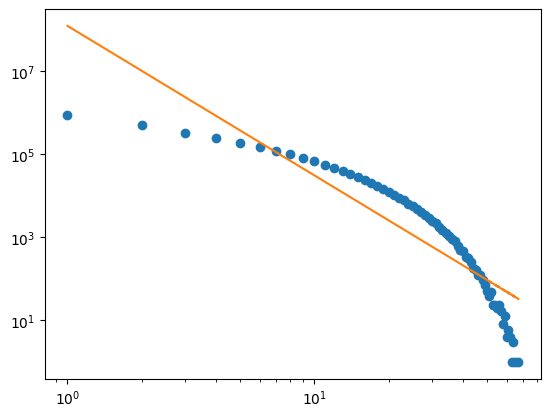

α = -3.5977468556185044


In [186]:
times, sizes, iterations = zip(*avalanches)

size_occurrences = pd.value_counts(np.array(sizes))

x = np.array(size_occurrences.index)
y = np.array(size_occurrences.values)

m, b = np.polyfit(np.log(x), np.log(y), 1)

plt.plot(x, y, 'o')
plt.plot(x, np.e**(m*np.log(x) + b))
plt.yscale('log')
plt.xscale('log')
plt.show()
print(f'α = {m}')

Wyznaczona zależność jest potęgowa, według uzyskanego α `N(s)~1/s^3`.

Dla kratownicy o rozmiarze 10x10 po około 250 iteracjach regularnie co kilkanaście iteracji występują lawiny o wielkości co najmniej 5.

![17_249](./images/sim_17/00249_00000.png)

Dla kratownicy o rozmiarze 100x100 po około 21000 iteracjach regularnie co kilkanaście iteracji występują lawiny o wielkości co najmniej 10.

![19_21529](./images/sim_19/21592_00009.png)


In [4]:
generate_gif(19,2,29926)
generate_gif(19,2,29930)
generate_gif(19,2,29899)
generate_gif(19,2,29894)
generate_gif(19,2,29877)

/tmp/ipykernel_206077/2200186350.py:19: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


In [5]:
generate_gif(17,2,399)
generate_gif(17,2,316)
generate_gif(17,2,296)
generate_gif(17,2,311)
generate_gif(17,2,346)

/tmp/ipykernel_206077/2200186350.py:19: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


Kratownica 10x10, lawina o rozmiarze 12:

![av0](./simulation_17_296.gif)

Kratownica 10x10, lawina o rozmiarze 8:

![av1](./simulation_17_311.gif)

Kratownica 10x10, lawina o rozmiarze 10:

![av2](./simulation_17_316.gif)

Kratownica 10x10, lawina o rozmiarze 6:

![av3](./simulation_17_346.gif)

Kratownica 10x10, lawina o rozmiarze 7:

![av4](./simulation_17_399.gif)

Kratownica 100x100, lawina o rozmiarze 11:

![av5](./simulation_19_29877.gif)

Kratownica 100x100, lawina o rozmiarze 10:

![av6](./simulation_19_29894.gif)

Kratownica 100x100, lawina o rozmiarze 11:

![av7](./simulation_19_29899.gif)

Kratownica 100x100, lawina o rozmiarze 19:

![av8](./simulation_19_29926.gif)

Kratownica 100x100, lawina o rozmiarze 11:

![av9](./simulation_19_29930.gif)

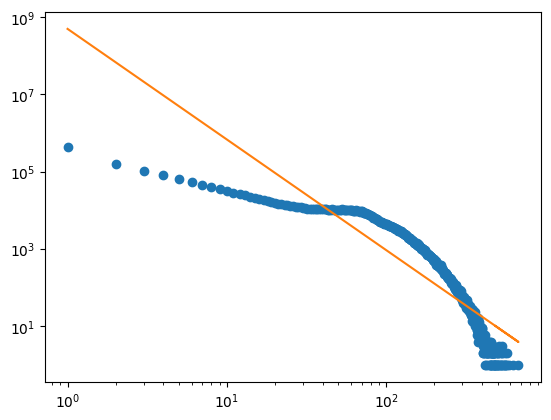

α = -2.8631294182059275


In [9]:
avalanches = []
for i in range(100):
    avalanches += run_sim(i, 10, 100000, limit=6, neighborhood=Moore, img=False)

times, sizes, iterations = zip(*avalanches)

size_occurrences = pd.value_counts(np.array(sizes))

x = np.array(size_occurrences.index)
y = np.array(size_occurrences.values)

m, b = np.polyfit(np.log(x), np.log(y), 1)

plt.plot(x, y, 'o')
plt.plot(x, np.e**(m*np.log(x) + b))
plt.yscale('log')
plt.xscale('log')
plt.show()
print(f'α = {m}')

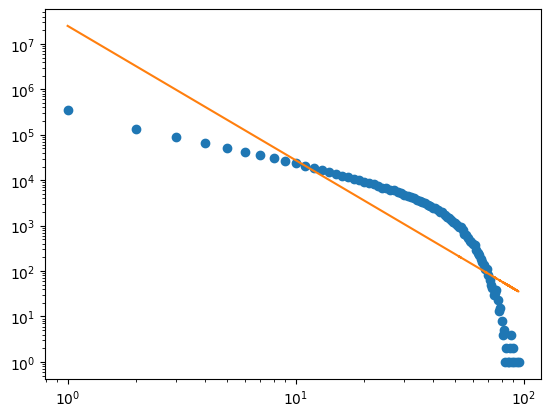

α = -2.9565535618265804


In [10]:
avalanches = []
for i in range(100):
    avalanches += run_sim(i, 10, 100000, limit=10, neighborhood=Manhattan, img=False)

times, sizes, iterations = zip(*avalanches)

size_occurrences = pd.value_counts(np.array(sizes))

x = np.array(size_occurrences.index)
y = np.array(size_occurrences.values)

m, b = np.polyfit(np.log(x), np.log(y), 1)

plt.plot(x, y, 'o')
plt.plot(x, np.e**(m*np.log(x) + b))
plt.yscale('log')
plt.xscale('log')
plt.show()
print(f'α = {m}')

Niezależnie od parametrów modelu wartość α pozostaje w okolicach 3.